<a href="https://colab.research.google.com/github/kirsten-fung/project_gss/blob/main/graph_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [333]:
! git clone https://github.com/kirsten-fung/project_gss

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/project_gss/cleaned_project_gss.csv')
# print(df.head())
# print(df.info())
# print(df.describe())

fatal: destination path 'project_gss' already exists and is not an empty directory.


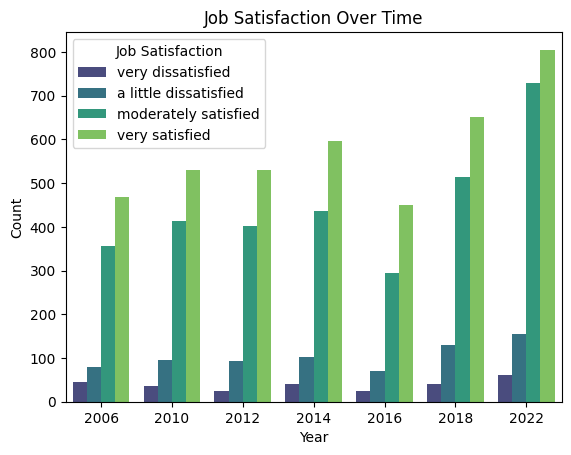

In [334]:
# Countplot of job satisfaction
sat_order = ['very dissatisfied','a little dissatisfied','moderately satisfied','very satisfied']
plot_palette = sns.color_palette("viridis", len(sat_order))
count_plot = sns.countplot(data=df, x='year', hue='job_satisfaction',hue_order=sat_order,palette=plot_palette)
count_plot.set_title('Job Satisfaction Over Time')
count_plot.set_xlabel('Year')
count_plot.set_ylabel('Count')
plt.legend(title='Job Satisfaction')
plt.show()

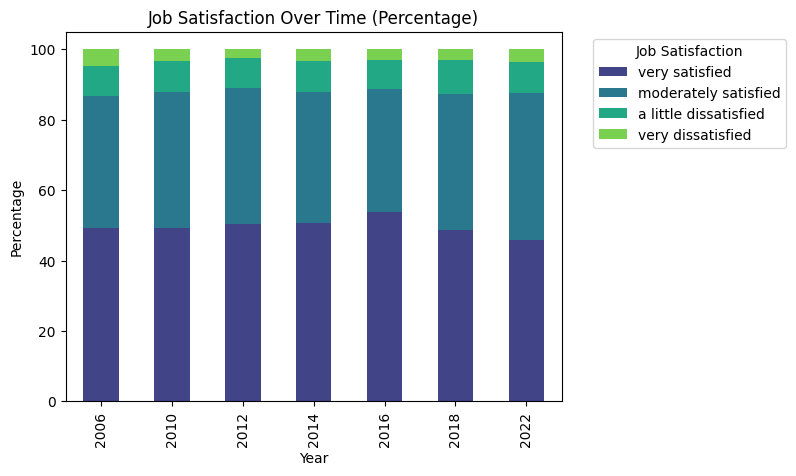

In [335]:
# Job satisfaction over time but as percentage of the year
sat_order = ['very satisfied', 'moderately satisfied', 'a little dissatisfied', 'very dissatisfied']

pivot_table = df.pivot_table(index='year', columns='job_satisfaction', aggfunc='size', fill_value=0)

pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

pivot_table_percentage = pivot_table_percentage[sat_order]

plot_palette = sns.color_palette("viridis", len(sat_order))
stacked_bar_plot = pivot_table_percentage.plot(kind='bar', stacked=True, color=plot_palette)

stacked_bar_plot.set_title('Job Satisfaction Over Time (Percentage)')
stacked_bar_plot.set_xlabel('Year')
stacked_bar_plot.set_ylabel('Percentage')
plt.legend(title='Job Satisfaction',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

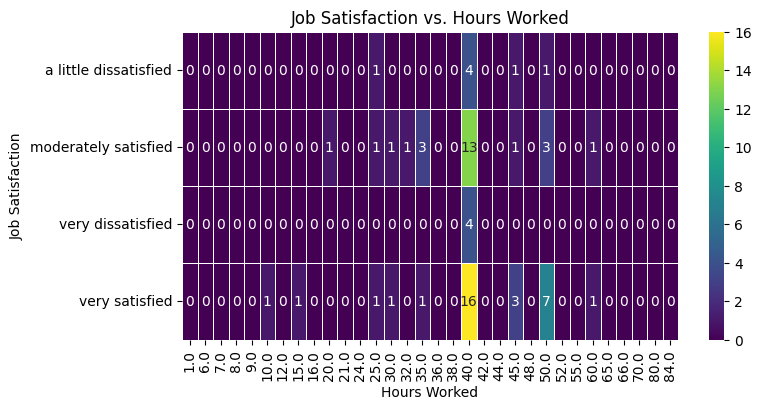

In [336]:
# Heatmap of overall Job Satisfaction vs. Hours Worked in percents
heatmap_data = df.pivot_table(index='job_satisfaction', columns='hours_worked', aggfunc='size', fill_value=0)
heatmap_data_percentage = (heatmap_data / heatmap_data.sum().sum() * 100).astype(int)
plt.figure(figsize=(8, 4))
heatmap = sns.heatmap(heatmap_data_percentage, cmap='viridis', annot=True, fmt='d', linewidths=0.5)
heatmap.set_title('Job Satisfaction vs. Hours Worked')
heatmap.set_xlabel('Hours Worked')
heatmap.set_ylabel('Job Satisfaction')
plt.show()

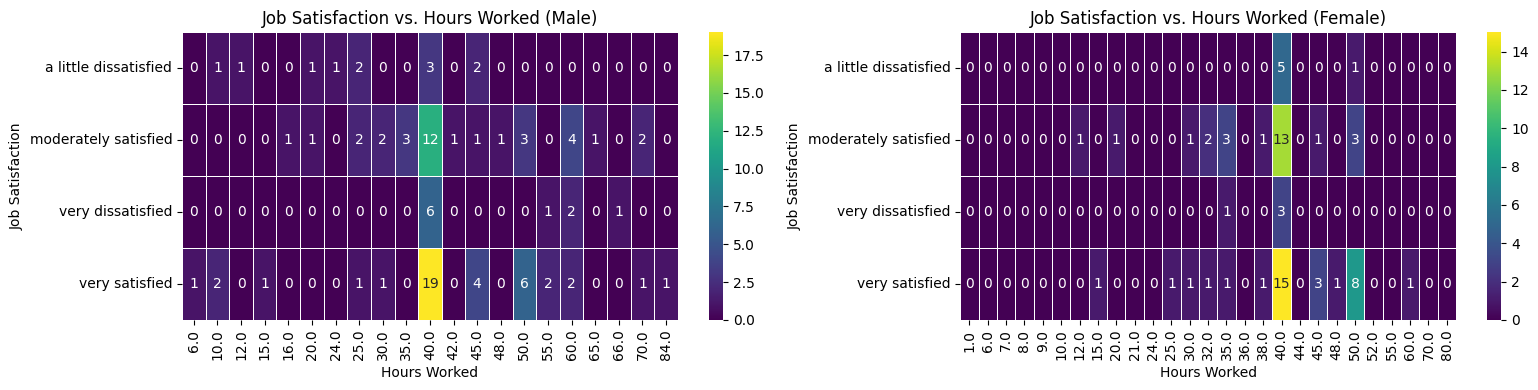

In [337]:
# Heatmap of overall Job Satisfaction vs. Hours Worked in percents for male and female
df_male = df[df['sex'] == 'male']
df_female = df[df['sex'] == 'female']

heatmap_data_male = df_male.pivot_table(index='job_satisfaction', columns='hours_worked', aggfunc='size', fill_value=0)
heatmap_data_female = df_female.pivot_table(index='job_satisfaction', columns='hours_worked', aggfunc='size', fill_value=0)

heatmap_data_male_percentage = (heatmap_data_male / heatmap_data_male.sum().sum() * 100).astype(int)
heatmap_data_female_percentage = (heatmap_data_female / heatmap_data_female.sum().sum() * 100).astype(int)

fig, axes = plt.subplots(1, 2, figsize=(16, 4))

heatmap_male = sns.heatmap(heatmap_data_male_percentage, cmap='viridis', annot=True, fmt='d', linewidths=0.5, ax=axes[0])
heatmap_male.set_title('Job Satisfaction vs. Hours Worked (Male)')
heatmap_male.set_xlabel('Hours Worked')
heatmap_male.set_ylabel('Job Satisfaction')

heatmap_female = sns.heatmap(heatmap_data_female_percentage, cmap='viridis', annot=True, fmt='d', linewidths=0.5, ax=axes[1])
heatmap_female.set_title('Job Satisfaction vs. Hours Worked (Female)')
heatmap_female.set_xlabel('Hours Worked')
heatmap_female.set_ylabel('Job Satisfaction')
plt.tight_layout()
plt.show()

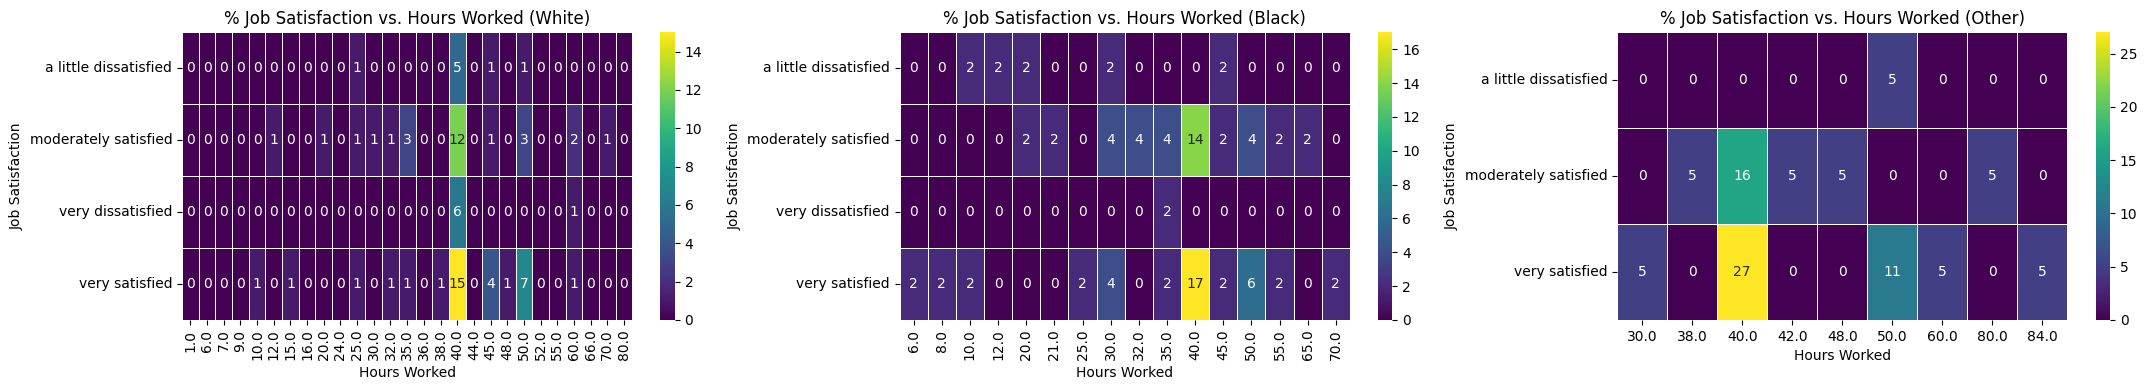

In [338]:
# Heatmap of overall Job Satisfaction vs. Hours Worked in percents for race
df_white = df[df['race'] == 'white']
df_black = df[df['race'] == 'black']
df_other = df[df['race'] == 'other']

heatmap_data_white = df_white.pivot_table(index='job_satisfaction', columns='hours_worked', aggfunc='size', fill_value=0)
heatmap_data_black = df_black.pivot_table(index='job_satisfaction', columns='hours_worked', aggfunc='size', fill_value=0)
heatmap_data_other = df_other.pivot_table(index='job_satisfaction', columns='hours_worked', aggfunc='size', fill_value=0)

heatmap_data_white_percentage = (heatmap_data_white / heatmap_data_white.sum().sum() * 100).astype(int)
heatmap_data_black_percentage = (heatmap_data_black / heatmap_data_black.sum().sum() * 100).astype(int)
heatmap_data_other_percentage = (heatmap_data_other / heatmap_data_other.sum().sum() * 100).astype(int)

fig, axes = plt.subplots(1, 3, figsize=(22, 4))

heatmap_white = sns.heatmap(heatmap_data_white_percentage, cmap='viridis', annot=True, fmt='d', linewidths=0.5, ax=axes[0])
heatmap_white.set_title('% Job Satisfaction vs. Hours Worked (White)')
heatmap_white.set_xlabel('Hours Worked')
heatmap_white.set_ylabel('Job Satisfaction')

heatmap_black = sns.heatmap(heatmap_data_black_percentage, cmap='viridis', annot=True, fmt='d', linewidths=0.5, ax=axes[1])
heatmap_black.set_title('% Job Satisfaction vs. Hours Worked (Black)')
heatmap_black.set_xlabel('Hours Worked')
heatmap_black.set_ylabel('Job Satisfaction')

heatmap_other = sns.heatmap(heatmap_data_other_percentage, cmap='viridis', annot=True, fmt='d', linewidths=0.5, ax=axes[2])
heatmap_other.set_title('% Job Satisfaction vs. Hours Worked (Other)')
heatmap_other.set_xlabel('Hours Worked')
heatmap_other.set_ylabel('Job Satisfaction')

plt.tight_layout()
plt.show()

<ipython-input-339-2f07f11083d4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  voilin_plot = sns.violinplot(data=df,x=category,y=values,palette=plot_palette)
<ipython-input-339-2f07f11083d4>:5: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  voilin_plot = sns.violinplot(data=df,x=category,y=values,palette=plot_palette)


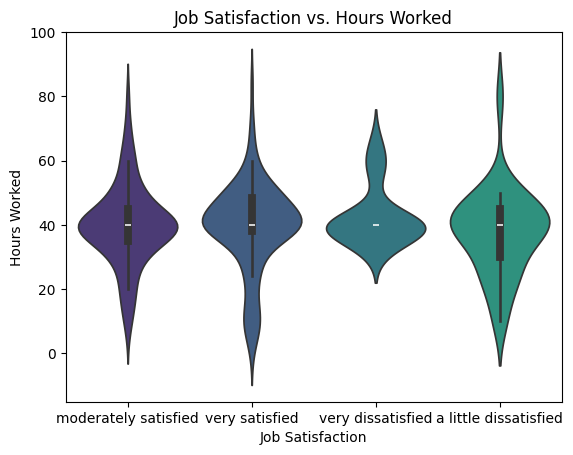

In [339]:
# Violin plot of job satisfaction vs. hours worked
category = 'job_satisfaction'
values = 'hours_worked'
plot_palette = sns.color_palette("viridis")
voilin_plot = sns.violinplot(data=df,x=category,y=values,palette=plot_palette)
voilin_plot.set_title('Job Satisfaction vs. Hours Worked')
voilin_plot.set_xlabel('Job Satisfaction')
voilin_plot.set_ylabel('Hours Worked')
plt.show()

In [340]:
# Recode job satisfaction string to numeric
df['job_satisfaction'] = df['job_satisfaction'].replace(['very satisfied'], 4)
df['job_satisfaction'] = df['job_satisfaction'].replace(['moderately satisfied'], 3)
df['job_satisfaction'] = df['job_satisfaction'].replace(['a little dissatisfied'], 2)
df['job_satisfaction'] = df['job_satisfaction'].replace(['very dissatisfied'], 1)

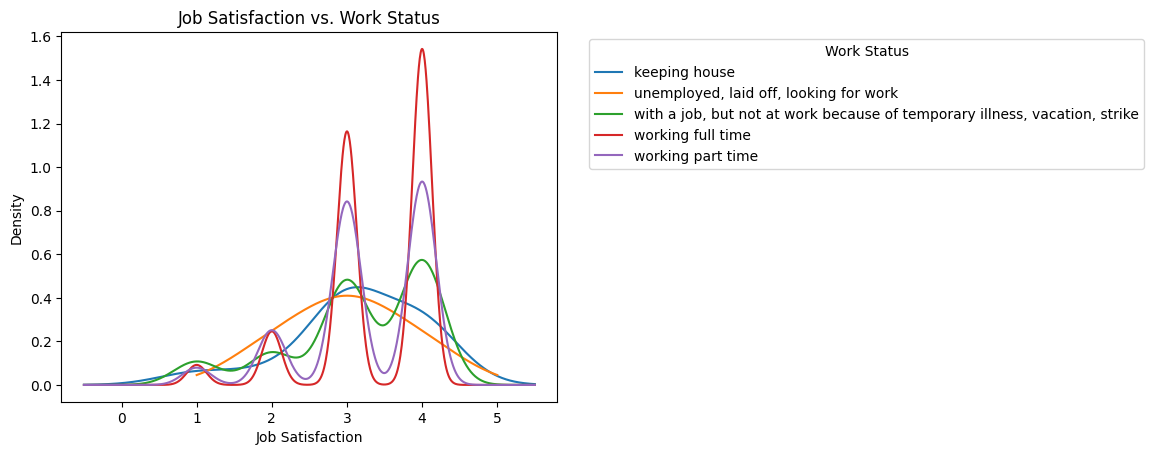

In [341]:
# Kernal density plot of job satisfaction vs. work status
df1 = df.pivot(columns='work_status',values='job_satisfaction')
df1.plot.density()
plt.title('Job Satisfaction vs. Work Status')
plt.xlabel('Job Satisfaction')
plt.legend(title='Work Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

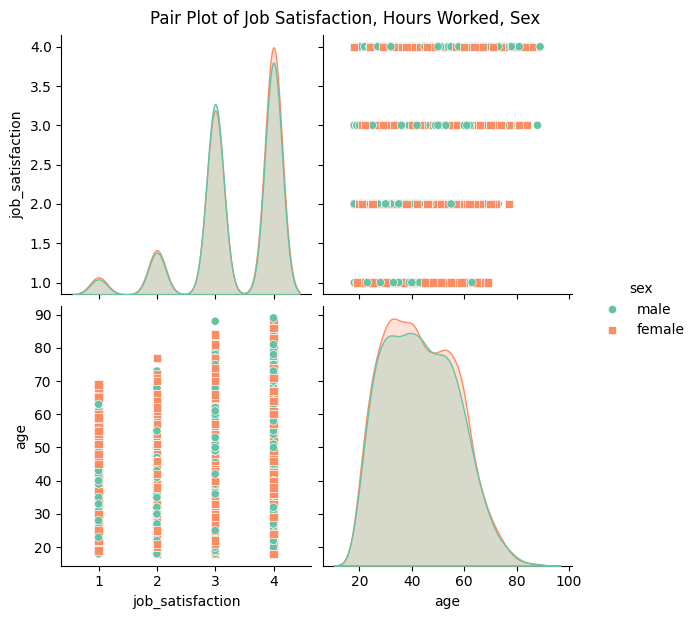

In [342]:
# Pairplot
df2 = df[['job_satisfaction','sex','age']]
pair_plot = sns.pairplot(df2, hue='sex', palette='Set2', markers=['o','s'],diag_kind='kde', height=3)
pair_plot.fig.suptitle('Pair Plot of Job Satisfaction, Hours Worked, Sex', y=1.02)
plt.show()

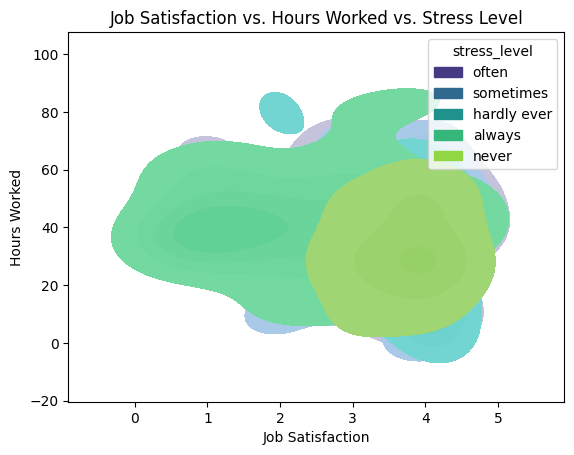

In [343]:
# Kernal density plot
kde_plot = sns.kdeplot(data=df, x='job_satisfaction', y='hours_worked', hue='stress_level', fill=True, palette='viridis')
kde_plot.set_title('Job Satisfaction vs. Hours Worked vs. Stress Level')
kde_plot.set_xlabel('Job Satisfaction')
kde_plot.set_ylabel('Hours Worked')
plt.show()

<ipython-input-344-35864f1d774e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='income', y='job_satisfaction', data=df, palette='viridis',order=cat_order)
<ipython-input-344-35864f1d774e>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, ha='right')


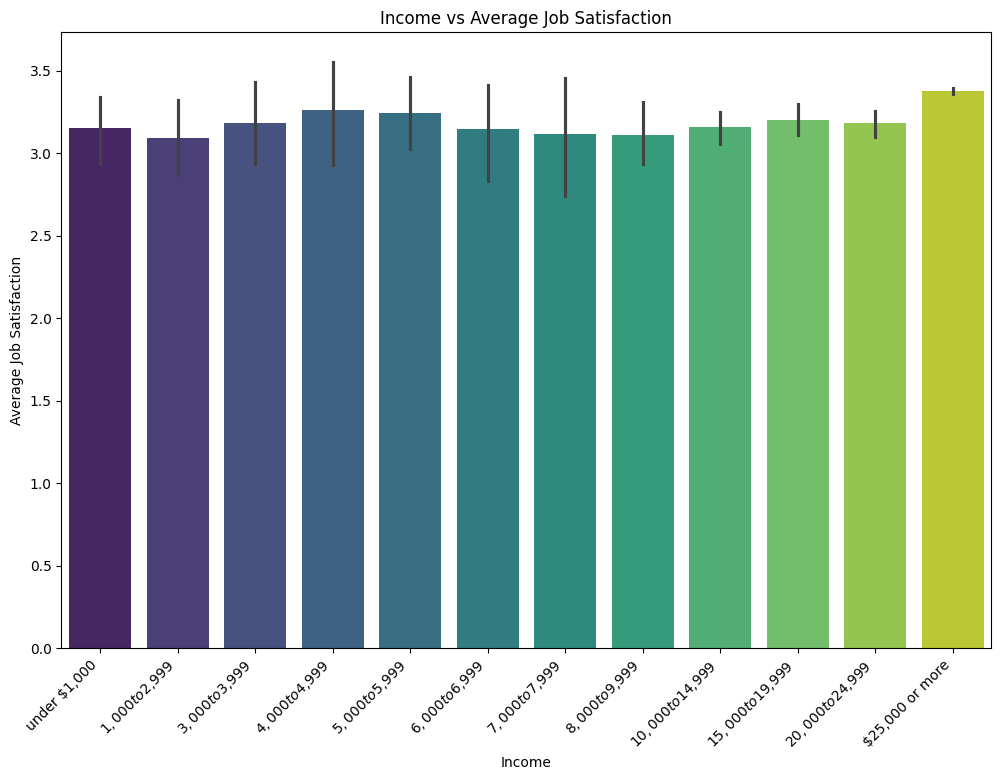

In [344]:
plt.figure(figsize=(12, 8))
cat_order = ['under $1,000', '$1,000 to $2,999', '$3,000 to $3,999', '$4,000 to $4,999','$5,000 to $5,999','$6,000 to $6,999','$7,000 to $7,999','$8,000 to $9,999','$10,000 to $14,999','$15,000 to $19,999','$20,000 to $24,999','$25,000 or more']
bar_plot = sns.barplot(x='income', y='job_satisfaction', data=df, palette='viridis',order=cat_order)
bar_plot.set_title('Income vs Average Job Satisfaction')
bar_plot.set_xlabel('Income')
bar_plot.set_ylabel('Average Job Satisfaction')
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, ha='right')
plt.show()